1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


2. Load Dataset

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Dataset Shape (Rows & Columns)

In [3]:
print("Dataset Shape:", customer_data.shape)

Dataset Shape: (200, 5)


4. Dataset Information

In [4]:
print(customer_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


5. Check for Missing Values

In [5]:
print(customer_data.isnull().sum())


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


6. Select Features (Annual Income & Spending Score)

In [ ]:
x = customer_data.iloc[:, [3, 4]].values
print(x)   


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

7.  Find WCSS for Different Clusters

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print("WCSS values:", wcss)


WCSS values: [269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


8. Elbow Method Graph

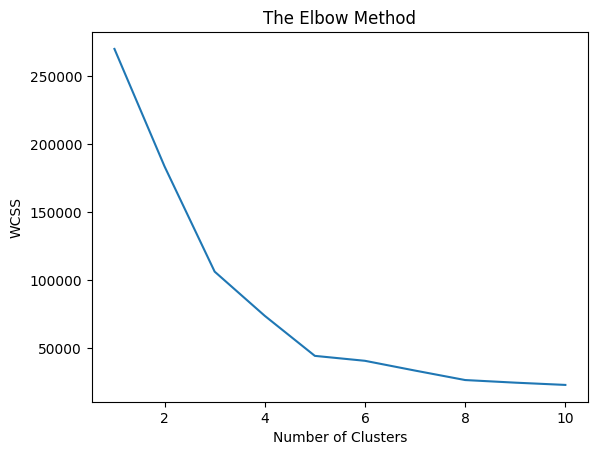

In [9]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


9. Train KMeans Model with Optimal Clusters (K=5)

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)


10. Visualize Clusters and Centroids

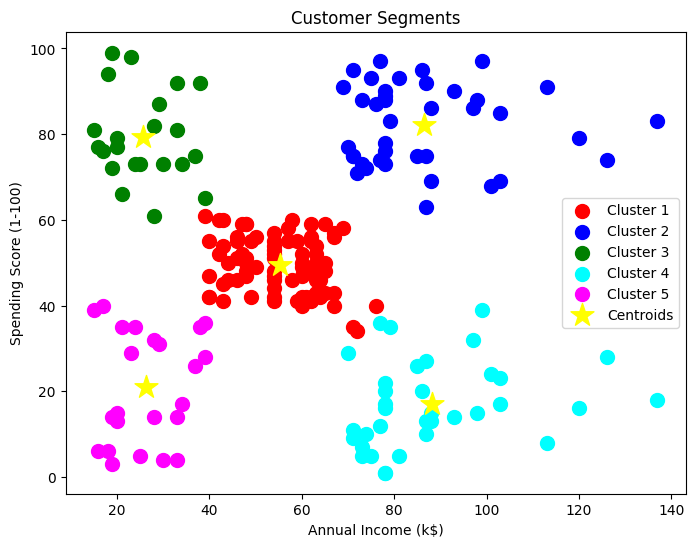

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


11. Evaluating Clustering with Silhouette Score

In [12]:
# Evaluating clustering with Silhouette Score
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the chosen number of clusters (k=5)
score = silhouette_score(x, kmeans.labels_)
print("Silhouette Score for k=5:", score)


Silhouette Score for k=5: 0.553931997444648


12. Cluster Profiling (Understanding Each Segment)

In [13]:

# Add the cluster labels to the dataset
customer_data['Cluster'] = kmeans.labels_

# Group by cluster and calculate mean values
cluster_profile = customer_data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Profiles:")
print(cluster_profile)



Cluster Profiles:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


13. 3D Visualization of Customer Segments

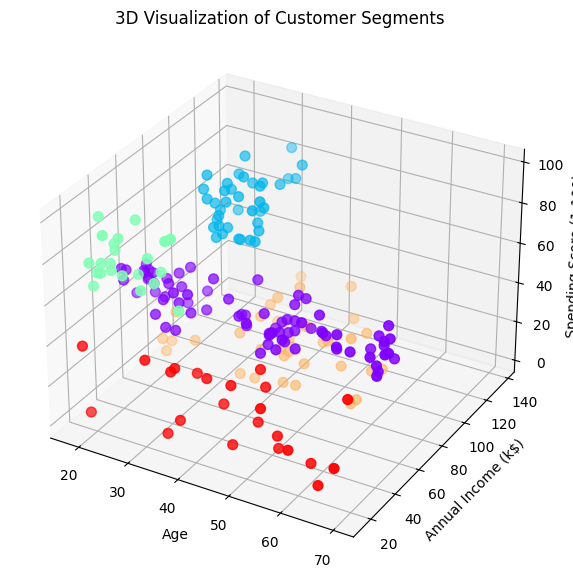

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(customer_data['Age'], 
           customer_data['Annual Income (k$)'], 
           customer_data['Spending Score (1-100)'], 
           c=customer_data['Cluster'], 
           cmap='rainbow', 
           s=50)

ax.set_title('3D Visualization of Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()


# Conclusion  

In this project, we successfully performed **Customer Segmentation** using the **K-Means Clustering** algorithm on the *Mall Customers dataset*. By considering features such as **Annual Income** and **Spending Score**, we identified distinct customer groups with similar purchasing behaviors.  

---

## Findings  

- Using the **Elbow Method**, we determined that the optimal number of clusters is **5**.  
- The **Silhouette Score** confirmed that the chosen clusters were reasonably well-separated, validating our segmentation approach.  
- Through **Cluster Profiling**, we analyzed the characteristics of each segment, revealing patterns such as:  

  - **Cluster 1 – High Income, High Spending** → Premium customers (most valuable).  
  - **Cluster 2 – High Income, Low Spending** → Potential customers (need better engagement).  
  - **Cluster 3 – Low Income, High Spending** → Young, enthusiastic shoppers.  
  - **Cluster 4 – Low Income, Low Spending** → Budget-conscious/less active customers.  
  - **Cluster 5 – Moderate Income, Moderate Spending** → Average customers with stable habits.  

- The **3D Visualization** further enhanced understanding of customer distribution across **Age, Income, and Spending Score**.  

---

## Key Takeaways  

1. Helps businesses design **targeted marketing campaigns**.  
2. Enables **personalized offers and discounts**.  
3. Improves **customer retention strategies** by focusing on premium or at-risk groups.  
4. Supports **data-driven decision making** for resource allocation and engagement.  

---

✅ With this analysis, we not only implemented clustering but also derived **practical business insights**, making the project both **technically strong** and **professionally valuable**.  
